<a href="https://colab.research.google.com/github/Yudaeun/Data_Analysis/blob/main/Prevention_of_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

In [ ]:
import numpy as np

In [ ]:
matrix_a=np.asarray([[4,5,2],
                    [5,2,6],
                    [6,1,-2]])
matrix_b=np.asarray([[5,9,2],
                     [2,0,3],
                     [1,-4,5]])
matrix_c=matrix_a+matrix_b
print(matrix_c)

[[ 9 14  4]
 [ 7  2  9]
 [ 7 -3  3]]


Numpy는 파이썬에서 가장 많이 쓰이고 있는 벡터나 행렬같은 수학적인 데이터 구조를 표현하고 연산하는 기본적인 기능이 효율적으로 구현되어 있는 수치 계산 라이브러리이다.

# Pandas 

Pandas는 numpy를 기반으로 고차원적인 데이터 처리를 할 수 있는 라이브러리이다. 동일한 데이터를 가진 Series를 기본으로 하고, 이를 여러개 묶어서 사용하는 DataFrame을 사용해서 표 형태로 된 자료를 다룬다.

In [ ]:
import pandas as pd

In [ ]:
col_id=pd.Series(data=[5,14,21,25])
col_team=pd.Series(data=['A','B','B','A'])
col_name=pd.Series(data=['루루','나나','미미','시루'])
col_score=pd.Series(data=[100,95,60,80])

df=pd.DataFrame(data={'Id':col_id,
                      'Team':col_team,
                      'Name':col_name,
                      'Scroe':col_score})
df.set_index('Id',inplace=True)
df

,Team,Name,Scroe
Id,,,
5,A,루루,100
14,B,나나,95
21,B,미미,60
25,A,시루,80


In [ ]:
df.groupby('Team').mean()

,Scroe
Team,
A,90.0
B,77.5


팀별 score 평균을 나타낸다.

# Matplotlib

Matplotlib는 파이썬에서 매트랩(매트랩 단어보니 속 안 좋아진다.) 스타일의 그래프를 그리기 위해 만들어진 오픈소스 패키지이다. 자세한 내용은 [matplotlib.org](https://matplotlib.org)에서 확인

In [ ]:
import matplotlib.pyplot as plt

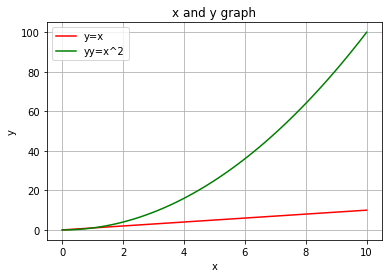

In [ ]:
x=np.linspace(0,10,100)
y=x
yy=x ** 2

fig=plt.figure()
ax=fig.gca() # 좌표축
ax.plot(x,y,'r-')
ax.plot(x,yy,'g-')
ax.set_title('x and y graph')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['y=x','yy=x^2'])
ax.grid()
fig.show()


0부터 10까지 1을 간격으로 100개의 1차원 배열이 만들어지고 그것을 바탕으로 그래프를 그린다. yy는 x^2이고 y=x 

# 의료 데이터를 분석해 심부전증 예방이 가능할까?

### 의료 데이터의 수집
* 의료 데이터는 민감한 개인정보가 많이 들어가 있기 때문에, 가명정보를 사용하게 하여 비식별화를 했다. 이를 통해 의료 데이터를 민간 사업체나 연구원들에게 바이오 데이터로써 제공할 수 있게 하여 큰 발전의 발판이 되었으며, 현재는 의료 데이터를 다룰 수 있는 사람들이 많이 필요해지고 있다.

### 의료 데이터 분석의 현재
* 의료 데이터는 핀란드, 덴마크, 영국, 미국, 중국 에서 많이 분석해오고 있었다. 그에 비해 우리나라는 아직 걸음마 단계이기 때문에 의료 데이터를 다루는 인재가 많이 필요하다.


# 1. DataSet 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Kaggle API Setting

In [4]:
import os

In [5]:
os.environ['KAGGLE_USERNAME']='yudaeun0918'
os.environ['KAGGLE_KEY']='3ebc0e802e33f64d11dce5442e93d2dc'

In [6]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 1.59MB/s]


In [7]:
!ls

heart-failure-clinical-data.zip  sample_data


In [8]:
!unzip '*.zip'

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


# 3. Pandas 라이브러리로 csv 파일 읽기

In [9]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 4.EDA 및 데이터 기초 통계 분석

In [10]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


platelets가 혈소판이라고 한다...time은 환자를 관찰한 기간이다.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


총 298개 인덱스가 있고 비어있는 데이터 없이 꽉 차 있는 상태이다. 굉장히 clean한 데이터 상태이다. good

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


anaemia보면 평균값이 거의 0.5 정도니까 거의 반반? 밸런스가 맞는 것같다. 보면 1/3 정도가 사망한 것 같다. 

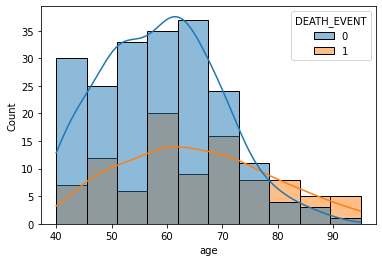

In [16]:
sns.histplot(x='age',data=df, hue='DEATH_EVENT',kde=True)

젊은 층은 거의 없고 거의 40대 이상이고, 60대가 가장 많다. 사망자 역시 마찬가지고... 젊은 층에서 사망자가 낮다. 당연한 말이긴 한데.

In [17]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

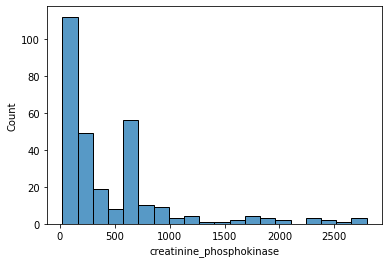

In [22]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase']<3000,'creatinine_phosphokinase'])

크레아틴...키나제..이게 뭔데

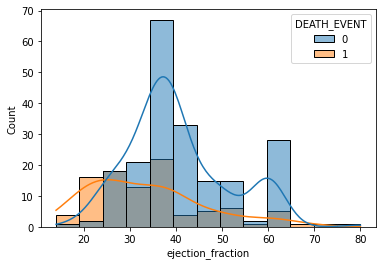

In [25]:
sns.histplot(x='ejection_fraction',data=df,bins=13,hue='DEATH_EVENT',kde=True)

흠....ejection_fraction=심실 이완 말기의 심실 혈액량에 대한 1회 박출량 비 인데... 솔직히 뭔 소린진 잘 모르겠고... 박출량이 낮으면 사망자가 꽤 많이 나오는 것 같다.

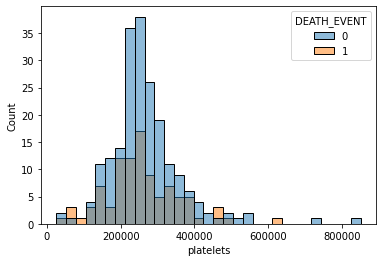

In [28]:
sns.histplot(x='platelets',data=df,hue='DEATH_EVENT')

platelets 이거는 사망이랑 별로 관련이 없는 것 같으니까 딱히 도움 안 될 것 같다. platelets ... 혈소판이라고 하는데... 왜 관련이 없지? 의학은 신기하네 

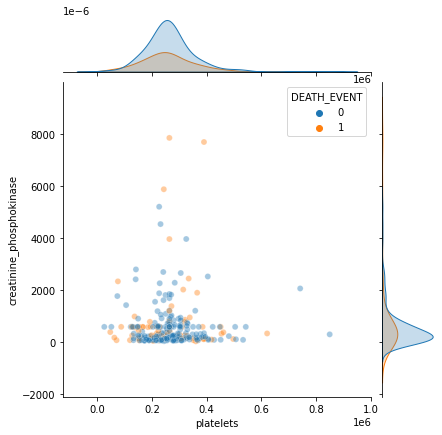

In [30]:
sns.jointplot(x='platelets',y='creatinine_phosphokinase',hue='DEATH_EVENT',data=df,alpha=0.4)

뭉쳐있어서 잘 모르겠다

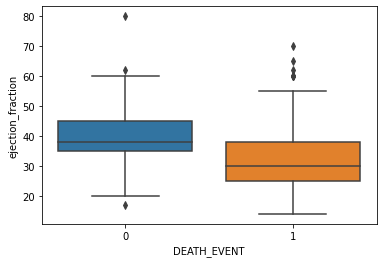

In [31]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=df)

박스 그리니까 더 직관적으로 알 수 있는 것 같다. 박출량이 낮은 구간에 사망자가 많은 점?

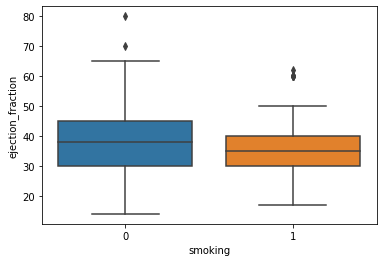

In [32]:
sns.boxplot(x='smoking',y='ejection_fraction',data=df)

역시나가 역시나다. 이래서 담배는 안 된다. 흡연을 하는 사람들이 박출량 범위가 좁은 것을 확인 할 수 있다. 위에서 했듯이 박출량이 낮으면 사망하기 좋은데(?) 담배를 피면 박출량이 낮아지고... 그래서 사망률이 올라간다는 결론을 도출할 수 있는듯. 길거리에서 담배 좀 피지마라 객사 하기 싫음

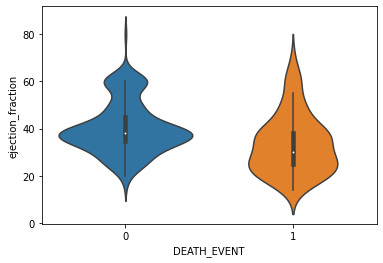

In [33]:
sns.violinplot(x='DEATH_EVENT',y='ejection_fraction',data=df)

violinplot은 hist에서 얻은 정보와 박스플롯에서 얻은 정보를 한 꺼번에 나타낼 수 있는 기능이라고 해서 한번 써봤다. 하지만 많이 사용하는 플롯은 아니라고 한다.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


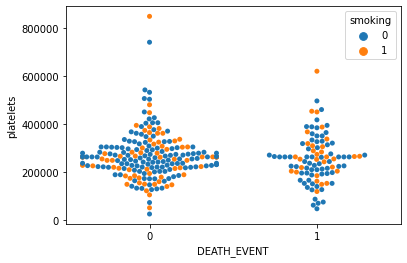

In [36]:
sns.swarmplot(x='DEATH_EVENT',y='platelets',data=df,hue='smoking')

스케터 플롯이랑 바이올린 플롯을 합쳐놓은 거라고 하던데 뭔가 분석하기가 쉽지 않아 보여서... 자주 쓰이진 않을 것 같다. 

# 5. 모델 학습을 위한 데이터 전처리

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [41]:
x_num=df[['age', 'creatinine_phosphokinase',
       'ejection_fraction',  'platelets',
       'serum_creatinine', 'serum_sodium',  'time']] #수치형 데이터
x_cat=df[['anaemia','diabetes','high_blood_pressure','sex','smoking']] #범주형 데이터
y=df['DEATH_EVENT']

In [43]:
scaler=StandardScaler()
scaler.fit(x_num)
x_scaled=scaler.transform(x_num)
x_scaled=pd.DataFrame(data=x_scaled,index=x_num.index,columns=x_num.columns)
x=pd.concat([x_scaled,x_cat],axis=1)

컬럼을 수치형 데이터와 범주형 데이터로 나누고, StandardScaler() 이용해서 데이터 표준화를 시켜줬다. 

In [44]:
x

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,1.803451,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,1.816357,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,1.906697,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,1.932509,0,0,0,1,1


In [45]:
x.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


In [47]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

train_test_split() 이용해서 학습 데이터랑 테스트 데이터를 분리했다.


> **분리해야 하는 이유:** 머신러닝 모델을 학습하고 그 결과를 검증하기 위해서는 원래의 데이터를 Training, Validation, Testing의 용도로 나누어 다뤄야 한다. 그렇지 않고 Training에 사용한 데이터를 검증용으로 사용하면 시험문제를 알고 있는 상태에서 공부를 하고 그 지식을 바탕으로 시험을 치루는 꼴이므로 제대로 된 검증이 이루어지지 않기 때문이다. 
*[출처] [Python] sklearn의 train_test_split() 사용법|작성자 Paris Lee*




In [53]:
from sklearn.linear_model import LogisticRegression

In [61]:
model=LogisticRegression(max_iter=1000,verbose=2)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, verbose=2)

In [62]:
from sklearn.metrics import classification_report

In [63]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90

